In [69]:
data = [{'setup': {'machine_num': 1.0,
   'iterations': 1000.0,
   'filename': 'facebook_combined.pagerank.1.1000.log'},
  'performance': {'time (s)': 8.02, 'memory_usage (mb)': 414.83}},
 {'setup': {'machine_num': 2.0,
   'iterations': 1000.0,
   'filename': 'facebook_combined.pagerank.2.1000.log'},
  'performance': {'time (s)': 7.8, 'memory_usage (mb)': 454.18}},
 {'setup': {'machine_num': 3.0,
   'iterations': 1000.0,
   'filename': 'facebook_combined.pagerank.3.1000.log'},
  'performance': {'time (s)': 9.4, 'memory_usage (mb)': 427.79}},
 {'setup': {'machine_num': 4.0,
   'iterations': 1000.0,
   'filename': 'facebook_combined.pagerank.4.1000.log'},
  'performance': {'time (s)': 6.21, 'memory_usage (mb)': 425.95}},
 {'setup': {'machine_num': 1.0,
   'epoch': 100.0,
   'filename': 'facebook_combined.n2v.1.100.log'},
  'performance': {'time (s)': 298.55}},
 {'setup': {'machine_num': 2.0,
   'epoch': 100.0,
   'filename': 'facebook_combined.n2v.2.100.log'},
  'performance': {'time (s)': 121.92}},
 {'setup': {'machine_num': 3.0,
   'epoch': 100.0,
   'filename': 'facebook_combined.n2v.3.100.log'},
  'performance': {'time (s)': 132.82}},
 {'setup': {'machine_num': 4.0,
   'epoch': 100.0,
   'filename': 'facebook_combined.n2v.4.100.log'},
  'performance': {'time (s)': 62.9}},
 {'setup': {'machine_num': 1.0,
   'iterations': 1000.0,
   'filename': 'facebook_combined.lpa.1.1000.log'},
  'performance': {'time (s)': 34.6}},
 {'setup': {'machine_num': 2.0,
   'iterations': 1000.0,
   'filename': 'facebook_combined.lpa.2.1000.log'},
  'performance': {'time (s)': 18.08}},
 {'setup': {'machine_num': 3.0,
   'iterations': 1000.0,
   'filename': 'facebook_combined.lpa.3.1000.log'},
  'performance': {'time (s)': 23.26}},
 {'setup': {'machine_num': 4.0,
   'iterations': 1000.0,
   'filename': 'facebook_combined.lpa.4.1000.log'},
  'performance': {'time (s)': 7.45}},
 {'setup': {'machine_num': 1.0,
   'kmin': 1.0,
   'kmax': 10000.0,
   'filename': 'facebook_combined.kcore.1.1.10000.log'},
  'performance': {'time (s)': 6.74}},
 {'setup': {'machine_num': 2.0,
   'kmin': 1.0,
   'kmax': 10000.0,
   'filename': 'facebook_combined.kcore.2.1.10000.log'},
  'performance': {'time (s)': 3.05}},
 {'setup': {'machine_num': 3.0,
   'kmin': 1.0,
   'kmax': 10000.0,
   'filename': 'facebook_combined.kcore.3.1.10000.log'},
  'performance': {'time (s)': 4.51}},
 {'setup': {'machine_num': 4.0,
   'kmin': 1.0,
   'kmax': 10000.0,
   'filename': 'facebook_combined.kcore.4.1.10000.log'},
  'performance': {'time (s)': 2.11}},
 {'setup': {'machine_num': 1.0,
   'outer_iteration': 100.0,
   'inner_iteration': 80.0,
   'filename': 'facebook_combined.fuf.1.100.80.log'},
  'performance': {'time (s)': 1008.79}},
 {'setup': {'machine_num': 2.0,
   'outer_iteration': 100.0,
   'inner_iteration': 80.0,
   'filename': 'facebook_combined.fuf.2.100.80.log'},
  'performance': {'time (s)': 549.93}},
 {'setup': {'machine_num': 3.0,
   'outer_iteration': 100.0,
   'inner_iteration': 80.0,
   'filename': 'facebook_combined.fuf.3.100.80.log'},
  'performance': {'time (s)': 558.17}},
 {'setup': {'machine_num': 4.0,
   'outer_iteration': 100.0,
   'inner_iteration': 80.0,
   'filename': 'facebook_combined.fuf.4.100.80.log'},
  'performance': {'time (s)': 326.8}},
 {'setup': {'machine_num': 1.0,
   'num_samples': 1000.0,
   'filename': 'facebook_combined.cnc.1.1000.log'},
  'performance': {'time (s)': 679.48, 'vps': 1.48}},
 {'setup': {'machine_num': 2.0,
   'num_samples': 1000.0,
   'filename': 'facebook_combined.cnc.2.1000.log'},
  'performance': {'time (s)': 359.78, 'vps': 2.8}},
 {'setup': {'machine_num': 3.0,
   'num_samples': 1000.0,
   'filename': 'facebook_combined.cnc.3.1000.log'},
  'performance': {'time (s)': 365.04, 'vps': 2.76}},
 {'setup': {'machine_num': 4.0,
   'num_samples': 1000.0,
   'filename': 'facebook_combined.cnc.4.1000.log'},
  'performance': {'time (s)': 166.4, 'vps': 6.07}}]

In [70]:
import re

group_num = 4 # number of data in each group

def group_by_algo(data, group_num):
    grouped_data = {}
    for i in range(0, len(data), group_num):
        name = data[i]['setup']['filename']
        found = re.search("^(\w+_*\w+)\.(\w+_*\w+)", name.replace("-","_"))
        dataset = found.group(1)
        algorithm = found.group(2)
        grouped_data[algorithm] = data[i:i+group_num]
    return dataset, grouped_data

In [71]:
dataset, grouped_data = group_by_algo(data, group_num)

In [72]:
from typing import Iterable

class GraphInfo(object):
    def __init__(self, algo:str, info_group:Iterable[dict]):
        self.__info_group = info_group
        self.__algo = algo
    
    def extract_y(self):
        out = {}
        for info in self.__info_group:
            perf = info['performance']
            for k, v in perf.items():
                if k not in out.keys():
                    out[k] = [v]
                else:
                    out[k].append(v)
        return out
    
    def extract_x(self):
        out = {}
        for info in self.__info_group:
            perf = info['setup']
            for k, v in perf.items():
                if k == 'filename':
                    continue
                if k not in out.keys():
                    out[k] = [v]
                else:
                    out[k].append(v)
        return out

    def graphable_perf(self):
        return self.extract_x(), self.extract_y()

    def get_algorithm(self):
        return self.__algo
        

In [73]:
import matplotlib.pyplot as plt
from textwrap import wrap
#%matplotlib inline

def addlabels(x,y, offset=0):
    for i in range(len(x)):
        plt.text(i+1+offset, y[i], y[i], ha = 'center')
    return

def plot_single_bar(plt, x, y, width, offset=0, color='blue'):
    plt.bar([i + offset for i in x], y, width = width, color=color)
    # configure y
    addlabels(x, y, offset)
    return plt

def dict_to_str(input:dict):
    ret = ""
    for k, v in input.items():
        ret+="{}={}, ".format(k,v[0])
    return ret[:-2]

def graph_single_algo(graph_info:GraphInfo, width=0.5):
    plt.clf()
    # data
    colors = ['blue', 'green','red','cyan', 'magenta']
    x_label = 'machine_num'
    x, y = graph_info.graphable_perf()
    x_copy = x.copy()
    x_copy.pop(x_label)
    num_plots = len(y.keys())
    x = x[x_label]

    title = "Performance of Plato {} algorithm with {}".format(graph_info.get_algorithm(), dict_to_str(x_copy))
    title="\n".join(wrap(title, 50))
    # plots
    plt.suptitle(title, fontsize=17, y=1.1)
    count = 0
    for k, v in y.items():
        ax = plt.subplot(1, num_plots, count+1)
        plt.ylabel(k, fontsize=16)
        plt.xlabel(x_label, fontsize=16)
        plot_single_bar(plt, x, v, width, color=colors[count])
        plt.setp(ax.get_xticklabels(), fontsize=14)
        plt.setp(ax.get_yticklabels(), fontsize=14)
        count += 1
    # overall
    plt.tight_layout()
    return plt

def save_fig(path):
    print(f"Saving to {path}")
    plt.savefig(path, bbox_inches='tight')

Saving to facebook_combined/pagerank_performance.png
Saving to facebook_combined/n2v_performance.png
Saving to facebook_combined/lpa_performance.png
Saving to facebook_combined/kcore_performance.png
Saving to facebook_combined/fuf_performance.png
Saving to facebook_combined/cnc_performance.png


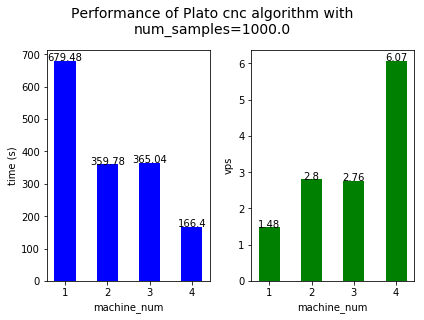

In [74]:
"""
Plot and saves
"""
def plot_all(grouped_data:dict):
    for k, v in grouped_data.items():
        info = GraphInfo(k, v)
        x, y = info.graphable_perf()
        graph_single_algo(info)
        save_fig(f'{dataset}/{k}_performance.png')
    return
plot_all(grouped_data)